# 4. Complex Oscillations

In physics and the other quantitative sciences, complex numbers are widely used for analyzing oscillations and waves. We begin our study of this topic with an important elementary model called the **damped harmonic oscillator**.

## The damped harmonic oscillator

Consider a particle of mass $m$ subject to a spring force and a damping force.  The particle can move along one dimension, with $x(t)$ denoting its displacement at time $t$.  The damping coefficient is $2m \gamma$, and the spring constant is $k = m\omega_0^2$.  The parameters $m$, $\gamma$, and $\omega_0$ are all positive real numbers.

<img src="img/oscillator.png" alt="Mechanical model of a damped harmonic oscillator." width=360>

The motion of the particle can be derived using Newton's second law:

$$m \frac{d^2 x}{dt^2} = F(x,t) = - 2m\gamma \frac{dx}{dt} - m\omega_0^2 x(t).$$

Dividing by the common factor of $m$, and bringing everything to one side, gives

$$\frac{d^2 x}{dt^2} + 2\gamma \frac{dx}{dt} + \omega_0^2 x(t) = 0.$$

This is called the **damped harmonic oscillator equation**.

<table width=75% style="font-size: 100%; border: 1px solid gray;">
    <tr><td style="text-align:left"><strong>Note</strong></td></tr>
<tr><td style="text-align:left">Sometimes, we write the damped harmonic oscillator equation as:$$\left[\frac{d^2}{dt^2} + 2\gamma \frac{d}{dt} + \omega_0^2 \right]\, x(t) = 0.$$ The quantity in square brackets is a linear differential operator acting on $x(t)$.  The three terms in the operator correspond to the three "ingredients" of the damped harmonic oscillator model: (i) a second derivative term stemming from Newton's second law, (ii) a first derivative term representing the effects of damping, and (iii) a constant term representing the oscillation induced by the spring force.<br/><br/>Another reason for writing the damped harmonic oscillator equation this way is that it becomes easy to see that the equation is linear: i.e., any superposition of solutions is likewise a solution (<a href="#ansatz">see below</a>).</td></tr></table>

### Behavior of the solution

The damped harmonic oscillator equation is a second-order [ordinary differential equation](01_derivatives.ipynb#ODE) (ODE). Its general solution must contain two free parameters, which are usually (but not necessarily) specified by the initial displacement $x(0)$ and initial velocity $\dot{x}(0)$.

For $\gamma = 0$ (zero damping), the system reduces to the **simple harmonic oscillator**. From previous physics courses, we know that the general solution to the simple harmonic oscillator has the form

$$x(t) = A \cos(\omega_0 t + \phi),$$

where $A$ and $\phi$ are free parameters. This describes a sinusoidal motion with constant amplitude $A$, phase $\phi$, and frequency $\omega_0$.

*Note: some authors call $\omega_0$ an "angular frequency", reserving the term "frequency" for the quantity $f_0 = \omega_0/2\pi$.  But we will always deal with $\omega_0$ rather than $f_0$. As such, we can refer to $\omega_0$ as "frequency" for brevity, without risk of ambiguity.*

The quantity $\omega_0$ is directly related to the spring constant by $k = m\omega_0^2$; in fact, this is precisely why we parameterized the spring constant in this way.  It is called the **natural frequency** &mdash; i.e., the natural oscillation frequency of the system when damping is absent.

The above general solution for the simple harmonic oscillator can be re-expressed in terms of the initial displacement $x(0) = x_0$ and initial velocity $\dot{x}(0) = v_0$. It is straightforward to show that

$$A = \sqrt{x_0^2 + \left(\frac{v_0}{\omega_0}\right)^2}, \quad \phi = -\tan^{-1}\left(\frac{v_0}{\omega_0 x_0}\right).$$

Now consider $\gamma > 0$. A damping force now opposes the motion, doing work against the particle and causing it to lose energy over time. Hence, the particle can no longer oscillate forever around the equilibrium position. If the damping force is relatively weak, the energy lost per cycle is relatively small, so the motion of the particle should consist of an oscillation whose amplitude diminishes slowly over time. For $t \rightarrow \infty$, both $x$ and $\dot{x}$ go to zero.

The following code generates an animation to visualize this behavior. (Don't worry about the formulas used to generate the solution; we will get to them later.)

In [3]:
## Generate an animation of a damped harmonic oscillator.
%matplotlib inline
from numpy import linspace, exp, cos, sqrt
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

rc('animation', html='html5')

def oscillation_animation():
    x0, gamma, omega0 = 1.0, 0.1, 1.0
    tmin, tmax, nt = 0., 50., 200
    nframes, frame_dt = 75, 67
    tmin_plt, xlim = -5, 1.2 # Axis limits
    circ_pos = -2

    fig = plt.figure(figsize=(10,5))
    ax  = plt.subplot(1,1,1)
    ax.set_xlim(tmin_plt, tmax); ax.set_ylim(-xlim, xlim)

    t = linspace(tmin, tmax, nt)
    x = x0 * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
    plt.xlabel('t'); plt.ylabel('x')
    plt.title('Motion of a damped harmonic oscillator.')
    ax.plot(t, x, color='blue', linewidth=2)
    line, = ax.plot([], [], color='grey', linewidth=2)
    dash, = ax.plot([], [], '--', color='grey', markersize=12)
    circ, = ax.plot([], [], 'o', color='red', markersize=12)
    plt.close();

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], []); circ.set_data([], []); dash.set_data([], [])
        return line, circ, dash

    # animation function. This is called sequentially
    def animate(n):
        t = tmin + (tmax-tmin)*n/nframes
        line.set_data([t, t], [-xlim, xlim])        
        xc = x0 * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
        circ.set_data(circ_pos, xc); dash.set_data([circ_pos, t], [xc, xc])
        return line, circ, dash

    # call the animator. blit=True means only re-draw the parts that have changed.
    animator = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=nframes, interval=frame_dt, blit=True)
    return animator

oscillation_animation()

## Complex solution

The variable $x(t)$ is the displacement of the particle, so it ought to be real. However, it turns out that we can solve the damped harmonic oscillator equation by generalizing $x(t)$ to *complex* values.  In other words, we convert the harmonic oscillator equation into a complex ODE:

$$\frac{d^2 z}{dt^2} + 2\gamma \frac{dz}{dt} + \omega_0^2 z(t) = 0, \quad z(t) \in \mathbb{C}.$$

The [parameter-counting rule for real ODEs](derivatives.ipynb#ODE) generalizes to complex ODEs, except that the parameters are now complex numbers. Since the complex damped harmonic oscillator equation is a second-order ODE, its general solution must have two complex free parameters.

Let us now figure out how to obtain the general solution to the complex damped harmonic oscillator equation. After that, we will see how the complex solution can be used to solve the real problem.

### Complex ansatz<a name="ansatz"></a>

To derive the general solution, first note that the damped harmonic oscillator equation is linear. If we have two solutions $z_1(t)$ and $z_2(t)$, then any superposition

$$\psi_1 \, z_1(t) + \psi_2 \,z_2(t),\quad \mathrm{where}\;\, \psi_1, \psi_2 \in \mathbb{C}$$

is also a solution. This can be verified by direct substitution into the ODE.

Therefore, a good strategy for obtaining the general solution is to find two specific solutions and superpose them. The two coefficients, $\psi_1$ and $\psi_2$, would then serve as the general solution's two free parameters.

We can make a guess (or an **ansatz**) for a specific solution:

$$z(t) = e^{-i\omega t}.$$

Here, $\omega$ is a constant to be determined (which could be complex).  The first and second derivatives are:

$$\begin{align}\frac{dz}{dt} &= -i\omega\, e^{-i\omega t} \\ \frac{d^2z}{dt^2} &= -\omega^2\, e^{-i\omega t}\end{align}$$

Substituting these into the differential equation gives:

$$\left[-\omega^2 - 2i\gamma \omega + \omega_0^2 \right] e^{-i\omega t} = 0.$$

This equation holds for all $t$ if and only if the complex second-order polynomial on the left-hand side is zero:

$$-\omega^2 - 2i\gamma \omega + \omega_0^2 = 0.$$

The solutions for $\omega$ can be obtained from the quadratic formula:

$$\omega = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

Hence, we have found specific solutions that involve *complex* frequencies:

$$z(t) = \exp\big(-i\omega_\pm t\big), \;\;\mathrm{where}\;\; \omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

For each value of $\gamma$ and $\omega_0$, both $\omega_+$ and $\omega_-$ yield valid specific solutions.

### Complex frequencies

What does it mean to have an oscillation with a complex frequency?  If we write the real and imaginary parts of the frequency as $\omega = \omega_R + i \omega_I$, then

$$z(t) = e^{-i\omega t} = e^{\omega_I t} \; e^{-i\omega_R t}.$$

If both $\omega_R$ and $\omega_I$ are non-zero, this describes [a spiral trajectory in the complex plane](03_complex_numbers.ipynb#complex_spiral) whose magnitude either increases or decreases with time, depending on the sign of $\omega_I$.  To see this explicitly, we can write

$$z(t) = e^{\omega_I t} \; e^{-i\omega_R t} = R(t)\, e^{i\theta(t)}, \;\;\mathrm{where}\;\,\begin{cases}\displaystyle R(t) &= e^{\omega_I t}, \\ \displaystyle \theta(t) &= -\omega_R t.\end{cases}$$

The real part of $\omega$ determines the oscillation frequency, whereas the imaginary part determines whether the oscillation amplitude grows with time (amplification) or shrinks with time (damping).  A positive imaginary part implies amplification, and a negative imaginary part implies damping; zero imaginary part (i.e., a real frequency) implies constant-amplitude oscillation.

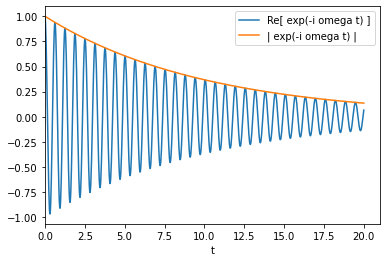

In [6]:
## In this example, we plot |z| and Re(z) for z = exp(-i omega t), with complex omega.
%matplotlib inline
from numpy import linspace, exp

omega = 10.0-0.1j     # If Im(omega) is negative, |z| diminishes exponentially with t.
t = linspace(0, 20, 1000)
z = exp(-1j*omega*t)

plt.plot(t, z.real, label='Re[ exp(-i omega t) ]')
plt.plot(t, abs(z), label='| exp(-i omega t) |')
plt.xlabel('t'); plt.xlim(0)
plt.legend()
plt.show()

Now let's look at the complex frequencies appearing in the specific solutions to the damped harmonic oscillator:

$$\omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

These depend on two real parameters: $\gamma$ and $\omega_0$. In the plot below, you can see how the position of $\omega_\pm$ in the complex plane depends on the values of these parameters.

In [8]:
## Plot the positions of omega_+ and omega_- in the complex plane
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, sin, cos, pi, sqrt
import matplotlib.pyplot as plt

def plot_frequencies(omega0, gamma):
    ## (Plot the circular arc that the points lie on.)
    phi = linspace(-pi, 0, 50)

    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    ax.set_aspect('equal')
    plt.plot(omega0*cos(phi), omega0*sin(phi), linestyle="dashed", color="grey")
    plt.plot([0,0], [-2,0], linestyle="dashed", color="grey")

    ## Compute omega_+ and omega_- and plot in the complex plane.
    u = sqrt(abs(omega0**2 - gamma**2))
    if omega0 >= gamma:
        w1, w2 = -1j * gamma + u, -1j * gamma - u
    else:
        w1, w2 = -1j * (gamma - u), -1j * (gamma + u)
    
    plt.plot(w1.real, w1.imag, 'o', color="red", linewidth=4, label="omega_+")
    plt.plot(w2.real, w2.imag, 'o', color="blue", linewidth=4, label="omega_-")
    plt.title('Complex plane positions of omega_+ and omega_-')
    plt.axis([-2, 2, -2, 0])
    plt.xlabel('Re(omega)'); plt.ylabel('Im(omega)')
    ax.legend(numpoints=1, loc='lower right')
    plt.show()

interact(plot_frequencies,
         omega0 = FloatSlider(min=0.5, max=1.5, step=0.1, value=1.0),
         gamma  = FloatSlider(min=0.0, max=1.25, step=0.05, value=0.1));

interactive(children=(FloatSlider(value=1.0, description='omega0', max=1.5, min=0.5), FloatSlider(value=0.1, d…

In particular, note the following features:

* For $\gamma = 0$ (zero damping), the two frequencies are both real, and take the values $\pm \omega_0$. This corresponds to simple harmonic oscillation at the oscillator's natural frequency.
* If we increase $\gamma$ from zero with $\omega_0$ fixed, both $\omega_+$ and $\omega_-$ move downwards in the complex plane, along a circular arc.  Since the imaginary part of the frequencies are negative, the particle undergoes damped oscillation. This is called **under-damped motion**.
* At $\gamma = \omega_0$, the frequencies meet along the imaginary axis. This is the case of **critical damping**, which we will discuss [later](#critical_damping).
* For $\gamma > \omega_0$, the two frequencies move apart along the imaginary axis. Purely imaginary frequencies correspond to a trajectory that decays without oscillating.  This is called **over-damped motion**, which we will also discuss [later](#overdamped).

## General solution for the damped harmonic oscillator

For now, suppose $\omega_0 \ne \gamma$.  In the previous section, we found two classes of specific solutions, with complex frequencies $\omega_+$ and $\omega_-$:

$$z_+(t) = e^{-i\omega_+ t} \;\;\mathrm{and}\;\; z_-(t) = e^{-i\omega_- t}, \;\;\mathrm{where}\;\;\; \omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

A general solution can be obtained by constructing a linear superposition of these specific solutions:

$$\begin{aligned}z(t) &= \psi_+ e^{-i\omega_+ t} + \psi_- e^{-i\omega_- t} \\ &= \psi_+ \, \exp\left[\left(-\gamma  - i \sqrt{\omega_0^2 - \gamma^2}\right)t\right] \; +\; \psi_- \, \exp\left[\left(-\gamma +i\sqrt{\omega_0^2 - \gamma^2}\right)t\right].\end{aligned}$$

This contains two undetermined complex parameters, $\psi_+$ and $\psi_-$. These are *independent* parameters since they are coefficients multiplying different functions (the functions are different because $\omega_0 \ne \gamma$ implies that $\omega_+ \ne \omega_-$).

To obtain the general solution to the *real* damped harmonic oscillator equation, we must take the real part of the complex solution. The result can be further simplified depending on whether $\omega_0^2 - \gamma^2$ is positive or negative. This leads to **under-damped solutions** or **over-damped solutions**, as discussed in the following subsections.

What if $\omega_0 = \gamma$? In this instance, $\omega_+ = \omega_-$, which means that $\psi_+$ and $\psi_-$ aren't independent parameters.  Therefore, the above equation for $z(t)$ isn't a valid general solution in this particular case!  We will discuss how to handle this case [later](#critical_damping).

### Under-damped motion<a name="underdamped"></a>

For $\omega_0 > \gamma$, let us define, for convenience,

$$\Omega = \sqrt{\omega_0^2 - \gamma^2}.$$

Then we can simplify the real solution as follows:

$$\begin{align}x(t) &= \mathrm{Re}\left[z(t)\right] \\ &= e^{-\gamma t} \; \mathrm{Re}\left[\psi_+ \, e^{-i \Omega t} \,+\, \psi_- \, e^{i\Omega t}\right] \\ &= e^{-\gamma t} \left[ A\cos\left(\Omega t\right) + B \sin\left(\Omega t\right)\right], \;\;\mathrm{where}\;\; A, B \in \mathbb{R}\end{align}$$

With a bit of algebra, we can show that

$$A = \mathrm{Re}\left[\psi_+ + \psi_-\right], \quad B = \mathrm{Im}\left[\psi_+ - \psi_-\right].$$

The coefficients $A$ and $B$ act as two independent *real* parameters, so this is a valid general solution for the real damped harmonic oscillator equation.  Using the trigonometric formulas, the solution can be equivalently written as

$$x(t) = C e^{-\gamma t} \cos\left[\Omega t + \Phi\right],$$

with the parameters $C = \sqrt{A^2 + B^2}$ and $\Phi = - \tan^{-1}\left[B/A\right]$.

Either way, this is called an **under-damped solution**.  As shown below, the trajectory is an oscillation whose amplitude decreases with time.  The decrease in the amplitude can be visualized using a smooth "envelope" given by $\pm C e^{-\gamma t}$, which is drawn with dashes in the figure.  Inside this envelope, the trajectory oscillates with frequency $\Omega = \sqrt{\omega_0^2 - \gamma^2}$, which is slightly less than the natural frequency of oscillation $\omega_0$.

In [9]:
## Plot the trajectory of an under-damped oscillator
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, cos, sqrt, exp
import matplotlib.pyplot as plt

def plot_underdamped(omega0, gamma, C, phi):
    x0, t = 1.0, linspace(0, 20, 120)

    xe = C * exp(-gamma*t)                           # The envelope
    x  = xe * cos(sqrt(omega0**2 - gamma**2)*t+phi)  # The trajectory
    
    plt.figure(figsize=(10,5))
    ## Plot envelope
    ax = plt.subplot(1,1,1)
    plt.title('Motion of an underdamped oscillator')
    plt.plot(t, x, 'b', label='x(t)')
    plt.plot(t, xe, 'r--', label='Envelope')
    plt.plot(t, -xe, 'r--')
    ## Axes, etc.
    plt.xlabel('t'); plt.xlim(t[0], t[-1])
    plt.ylabel('x'); plt.ylim(-x0, x0)
    ax.legend(numpoints=1, loc='upper right')
    plt.show()

interact(plot_underdamped,
         omega0 = FloatSlider(min=0.4, max=2.0, step=0.1, value=1.0),
         gamma  = FloatSlider(min=0.0, max=0.5, step=0.05, value=0.1),
         C      = FloatSlider(min=0.0, max=1.0, step=0.05, value=1.0),
         phi    = FloatSlider(min=-3.14, max=3.14, step=0.02, value=0.0));

interactive(children=(FloatSlider(value=1.0, description='omega0', max=2.0, min=0.4), FloatSlider(value=0.1, d…

### Over-damped motion<a name="overdamped"></a>

For $\omega_0 < \gamma$, the square root term is imaginary.  It is convenient to define

$$\Gamma = \sqrt{\gamma^2 - \omega_0^2} \quad \Rightarrow \quad \sqrt{\omega_0^2 - \gamma^2} = i \Gamma.$$

Then the real solution simplifies in a different way:

$$\begin{align} x(t) &= \mathrm{Re}\left[z(t)\right] \\&= \mathrm{Re}\left[\psi_+ e^{\left(-\gamma  + \Gamma\right)t} + \psi_- e^{\left(-\gamma - \Gamma\right)t} \right] \\ &= C_+ e^{-(\gamma - \Gamma) t} + C_- e^{-(\gamma + \Gamma) t},\end{align}$$

where

$$C_\pm = \mathrm{Re}[\psi_\pm].$$

This is called an **over-damped solution**. The solution consists of two terms, both exponentially decaying in time, with $(\gamma-\Gamma)$ and $(\gamma + \Gamma)$ serving as the decay rates. Note that both decay rates are positive real numbers, because  $\Gamma < \gamma$ from the definition of $\Gamma$.

Also, note that the first decay rate $(\gamma - \Gamma)$ is a *decreasing* function of $\gamma$, whereas the second decay rate $(\gamma + \Gamma)$ is an *increasing* function of $\gamma$, as shown in the plot below:

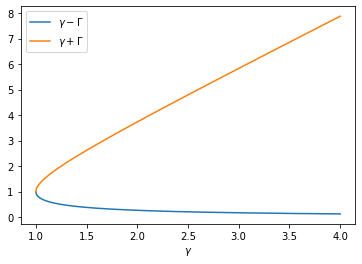

In [18]:
%matplotlib inline
from numpy import linspace, sqrt
import matplotlib.pyplot as plt

omega0 = 1.0
gamma  = linspace(1, 4, 500)
Gamma  = sqrt(gamma**2 - omega0**2)
plt.plot(gamma, gamma - Gamma, label=r'$\gamma - \Gamma$')
plt.plot(gamma, gamma + Gamma, label=r'$\gamma + \Gamma$')
plt.xlabel(r'$\gamma$')
plt.legend()
plt.show()

The code below plots the trajectory of the over-damped oscillator for different values of $\omega_0$, $\gamma$, $C_+$, and $C_-$:

In [14]:
## Plot the trajectory of an over-damped oscillator
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, sqrt, exp
import matplotlib.pyplot as plt

def plot_overdamped(omega0, gamma, C_minus, C_plus):
    x0, t = 2.0, linspace(0, 10, 150)

    ## Trajectory formulas
    G = sqrt(gamma**2 - omega0**2)
    xe = C_minus * exp(-(gamma-G)*t)
    x  = xe + C_plus * exp(-(gamma+G)*t)
    
    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    plt.title('Motion of an overdamped oscillator')
    plt.plot(t, x, 'b', label='x(t)')
    plt.plot(t, xe, 'r--', label='Limit')
    plt.axis([t[0], t[-1], -0.1*x0, x0])
    plt.xlabel('t'); plt.ylabel('x')
    ax.legend(numpoints=1, loc='upper right')
    plt.show()

interact(plot_overdamped,
         omega0  = FloatSlider(min=0.1, max=1.0, step=0.1, value=1.0),
         gamma   = FloatSlider(min=1.0, max=5.0, step=0.1, value=0.1),
         C_minus = FloatSlider(min=0.0, max=1.0, step=0.1, value=1.0),
         C_plus  = FloatSlider(min=0.0, max=1.0, step=0.1, value=1.0));

interactive(children=(FloatSlider(value=1.0, description='omega0', max=1.0, min=0.1), FloatSlider(value=1.0, d…

The larger decay rate, $(\gamma + \Gamma)$, is associated with a faster-decaying exponential. Therefore, at long times the second term becomes negligible compared to the first term. Then the solution approaches the limit

$$x(t) \approx C_+ e^{-(\gamma - \Gamma) t} \qquad (\mathrm{for}~\mathrm{large}~t).$$

This limiting curve is shown as a red dash in the above figure. Interestingly, since $(\gamma-\Gamma)$ is a decreasing function of $\gamma$, we find that *the stronger the damping, the slower the decay rate at long times*. This is the opposite of what happens in the under-damped regime!

Why does this happen? In the over-damped regime, the motion of the oscillator is dominated by the damping force rather than the spring force; as the oscillator tries to return to its equilibrium position $x = 0$, the damping acts against this motion.  Hence, the stronger the damping, the slower the decay to equilibrium. This contrasts sharply with the [under-damped regime](#underdamped), where the spring force dominates the damping force. In that case, stronger damping speeds up the decay to equilibrium, by causing the kinetic energy of the oscillation to dissipate more rapidly.

### Critical damping<a name="critical_damping"></a>

**Critical damping** occurs when $\omega_0 = \gamma$.  Under this special condition, [the solution we previously derived](#ansatz) reduces to

$$z(t) = \left(\psi_+ + \psi_-\right) e^{-\gamma t}.$$

This has only *one* independent complex parameter, i.e. the parameter $(\psi_+ + \psi_-)$.  Therefore, it cannot be a general solution for the complex damped harmonic oscillator equation, which is still a second-order ODE.

We will not go into detail here regarding the procedure for finding the general solution for the critically-damped oscillator, leaving it as an [exercise](#exercises) for the interested reader. Basically, the procedure is to Taylor expand the solution on either side of the critical point, and then show that there is a solution of the form

$$z(t) = \left(A + B t\right)\, e^{-\gamma t},$$

which contains the desired two independent parameters.

The critically-damped solution contains an exponential decay constant of $\gamma$, which is the same as the decay constant for the [envelope function in the under-damped regime](#underdamped), and *smaller* than the (long-time) decay constants in the [over-damped regime](#overdamped).  Hence, we can regard the critically-damped solution as the *fastest-decaying non-oscillatory solution*.

This feature of critical damping is employed in many engineering contexts, the most familiar being automatic door closers. If the damping is too weak or the spring force is too strong (under-damped), the door will slam shut, whereas if the damping is too strong or the spring force is too weak (under-damping), the door will take unnecessarily long to close.  Hence, door closers need to be tuned to a "sweet spot" corresponding to the critical damping point.

## Stating the solution in terms of initial conditions

The general solution for the complex damped harmonic oscillator equation, which we [obtained above](#ansatz), contains two undetermined parameters which are the complex amplitudes of the "clockwise" and "counterclockwise" complex oscillations:

$$z(t) = \psi_+ e^{-i\omega_+ t} + \psi_- e^{-i\omega_- t}, \quad\mathrm{where} \;\; \omega_\pm =  -i\gamma  \pm \sqrt{\omega_0^2 - \gamma^2}.$$

However, mechanics problems are often expressed in terms of an **initial value problem**, specifying the state of the system at some initial time $t = 0$. In other words, given $z(0) \equiv x_0$ and $\dot{z}(0) \equiv v_0$, what is $z(t)$ in terms of $x_0$ and $v_0$?

We can solve the initial-value problem by finding $z(0)$ and $\dot{z}(0)$ in terms of the above general solution for $z(t)$.  The results are

$$\begin{aligned} z(0) &= \quad \psi_+ + \psi_- &= x_0& \\ \dot{z}(0) &= -i\omega_+ \psi_+ - i \omega_- \psi_- &= v_0&.\end{aligned}$$

These two equations can be combined into a 2x2 matrix equation:

$$\begin{bmatrix}1 & 1 \\ -i\omega_+ & -i\omega_-\end{bmatrix} \begin{bmatrix}\psi_+ \\ \psi_-\end{bmatrix} = \begin{bmatrix}x_0 \\ v_0\end{bmatrix}.$$

So long as the system is not at the critical point (i.e., $\omega_+ \ne \omega_-$), the matrix is non-singular, and we can invert it to obtain $\psi_\pm$:

$$\begin{bmatrix}\psi_+ \\ \psi_-\end{bmatrix} = \frac{1}{i(\omega_+-\omega_-)}\begin{bmatrix}-i\omega_-x_0 - v_0 \\ i\omega_+x_0 + v_0 \end{bmatrix}.$$

We can plug these coefficients back into the general solution. After some algebra, the result simplifies to

$$z(t) = e^{-\gamma t} \left[x_0 \cos(\Omega t) + \frac{\gamma x_0 + v_0}{\Omega} \, \sin(\Omega t)\right], \;\; \mathrm{where}\;\; \Omega \equiv \sqrt{\omega_0^2 - \gamma^2}.$$

For the under-damped case, $\Omega$ is real, and this solution is consistent with the one [we previously derived](#underdamped), except that it is now explicitly expressed in terms our initial conditions $x_0$ and $v_0$. As for the [over-damped case](#overdamped), we can perform the replacement

$$\Omega \rightarrow i \Gamma = i \sqrt{\gamma^2 - \omega_0^2}.$$

Then, using the [relationships between trigonometric and hyperbolic functions](00_mathfunctions.ipynb#hyperbolic), the solution can be re-written as

$$\begin{aligned}z(t) &= e^{-\gamma t} \left[x_0 \cosh(\Gamma t) + \frac{\gamma x_0 + v_0}{i\Gamma} \, i \sinh(\Gamma t)\right] \\ &= \left(\frac{x_0}{2} + \frac{\gamma x_0 + v_0}{2\Gamma}\right) e^{-(\gamma - \Gamma) t} + \left(\frac{x_0}{2} - \frac{\gamma x_0 + v_0}{2\Gamma}\right) e^{-(\gamma+\Gamma)t},\end{aligned}$$

which is again consistent with our [previous result](#overdamped).

In either case, so long as we plug in real values for $x_0$ and $v_0$, the solution is guaranteed to be real for all $t$.  That's to be expected, since the real solution is also one of the specific solutions for the complex harmonic oscillator equation. The resulting solution is plotted below.

In [19]:
## Plot the general trajectory of an oscillator.
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, sin, cos, sqrt, exp
import matplotlib.pyplot as plt
from math import ceil

def plot_oscillator(omega0, gamma, x0, v0):
    t = linspace(0, 20, 100)

    if omega0 > gamma:
        W = sqrt(omega0**2 - gamma**2)
        A, B = x0, (gamma*x0+v0)/W
        x = exp(-gamma*t) * (A * cos(W*t) + B * sin(W*t))
    elif omega0 < gamma:
        G = sqrt(gamma**2 - omega0**2)
        A = 0.5*(x0 + (gamma*x0 + v0)/G)
        B = 0.5*(x0 - (gamma*x0 + v0)/G)
        x = A*exp(-(gamma-G)*t) + B * exp(-(gamma+G)*t)
    else:
        x = (x0 + (v0+gamma*x0)*t) * exp(-gamma*t)

    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    plt.title('Motion of a damped harmonic oscillator')

    plt.plot(t, x, 'b', label='x(t)')
    lim = max(ceil(1.1*max(abs(x))), 10.0)
    plt.xlabel('t'); plt.xlim(t[0], t[-1])
    plt.ylabel('x'); plt.ylim(-lim, lim)
    ax.legend(numpoints=1, loc='upper right')
    plt.show()

interact(plot_oscillator,
         omega0 = FloatSlider(min=0.1, max=1.9, step=0.1, value=0.5),
         gamma  = FloatSlider(min=0.0, max=2.0, step=0.1, value=0.5),
         x0     = FloatSlider(min=-2., max=2.0, step=0.1, value=1.0),
         v0     = FloatSlider(min=-5., max=5.0, step=0.1, value=5.0));

interactive(children=(FloatSlider(value=0.5, description='omega0', max=1.9, min=0.1), FloatSlider(value=0.5, d…

## Exercises

1. In the [general solution for the complex damped harmonic oscillator equation](#ansatz), we encountered the complex frequencies $$\omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$ For fixed $\omega_0$ and $\omega_0 > \gamma$ (under-damping), prove that $\omega_\pm$ lie along a circular arc in the complex plane.
2. Derive the [general solution for the critically-damped oscillator](#critical_damping), by following these steps:
    1. Consider the complex ODE, in the under-damped regime $\omega_0 > \gamma$.  We [have shown](#ansatz) that the general solution has the form $$z(t) = \psi_+ \, \exp\left[\left(-\gamma  - i \sqrt{\omega_0^2 - \gamma^2}\right)t\right] \; +\; \psi_- \, \exp\left[\left(-\gamma +i\sqrt{\omega_0^2 - \gamma^2}\right)t\right]$$ for some complex parameters $\psi_+$ and $\psi_-$.  Define the positive parameter $\varepsilon = \sqrt{\omega_0^2 - \gamma^2}$.  Re-write $z(t)$ in terms of $\gamma$ and $\varepsilon$ (i.e., eliminating $\omega_0$).
    2. The expression for $z(t)$ is presently parameterized by the independent parameters $\psi_+$, $\psi_-$, $\varepsilon$, and $\gamma$.  We are free to re-define the parameters, by taking $$\begin{aligned}\alpha &= \psi_+ + \psi_- \\ \beta &= -i\varepsilon(\psi_+ - \psi_-).\end{aligned}$$ Using these equations, express $z(t)$ using a new set of independent complex parameters, one of which is $\varepsilon$. Explicitly identify the other independent parameters, and state whether they are real or complex.
    3. Expand the exponentials in $z(t)$ in terms of the parameter $\varepsilon$.  Then show that in the limit $\varepsilon \rightarrow 0$, $z(t)$ reduces to the [critically-coupled general solution](#critical_damping).
3. Repeat the above derivation for the critically-damped solution, but starting from the over-damped regime $\gamma > \omega_0$.
4. A **parametric oscillator** is an oscillator whose spring "constant" varies with time, as described by the ordinary differential equation $$\left[\frac{d^2}{dt^2} + 2\gamma\frac{d}{dt} + \Omega(t)^2\right]x(t) = 0, \quad\mathrm{where}\;\;\Omega(t) = \omega_0\left[1 + \alpha \cos(2\omega_1 t)\right].$$ (The word "parametric" refers to the fact that the parameter $\Omega$, which is normally a constant, has been converted into a time-dependent quantity.) Suppose the "modulation frequency", $\omega_1$, is much smaller than the natural frequency $\omega_0$.  Let's make $x(t)$ complex, and look for a solution of the form $$x(t) = \psi(t) \, e^{-i\omega_0 t},$$ where $\psi(t)$ is a complex "envelope function" which varies much more slowly than the $e^{-i\omega_0 t}$ factor.  Mathematically, the slowness of the variation is represented by the condition $$\left|\frac{d^2\psi}{dt^2}\right| \ll \omega_0 \left|\frac{d\psi}{dt}\right|.$$ In such a situation, the second time derivative can be neglected; this is called the "slowly-varying envelope approximation".  With this approximation, show that the parametric oscillator equation reduces to the form $$\frac{d\left[\ln(\psi)\right]}{dt} = f(t),$$ and find $f(t)$.  Hence, solve for $\psi(t)$ and show that the oscillation ampitude $|\psi(t)|$ consists of an exponential decay overlaid on a sinusoidal modulation.
